In [84]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /Users/sueliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
import re
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from preprocess.clean_and_tokenize import clean_and_tokenize_one

In [5]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ",".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [187]:
def run_lda_expt(X, n_topics):
    lda_model = LatentDirichletAllocation(n_components=n_topics, doc_topic_prior=0.1, 
                                          topic_word_prior=0.1, random_state=42, n_jobs=-1)
    lda_model.fit(X)
    # Perplexity
    print("Model perplexity: {}".format(lda_model.perplexity(X)))
    return lda_model

In [162]:
file = 'data/to_nationwide.csv'
all_tweets = pd.read_csv(file, encoding='utf-8')

[nltk_data] Downloading package punkt to /Users/sueliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [163]:
length_filter = ((all_tweets.username != 'asknationwide') & (all_tweets.tweet.str.len()>14))|(all_tweets.username == 'asknationwide')
conversation_grouped = all_tweets[length_filter].groupby('conversation_id')
convoid = np.random.choice(conversation_grouped['id'].count()[conversation_grouped['id'].count() > 3].index)
#all_tweets[all_tweets.conversation_id == convoid].sort_values(['date','time'])[['username','tweet']].values

In [164]:
valid_cols = ['id', 'conversation_id', 'created_at', 'user_id', 'tweet']

In [176]:
model_df['tweet'].values[:10]

array(['Yep all the direct debits my brother did the switch and I entered the code',
       '@AskNationwide  switch account we switched to nationwide over 30 days now and still have not received the 100 pound nor has my brother I have been into my local bank a few times now and they said they would call me back and never have Is the 100 pound real or fake',
       '@AskNationwide  Do I need to inform you that I am going to Europe Italy so will be using my card abroad',
       'Super helpful lady on the phone but I’ve been told it won’t drop off until Tuesday. And in the mean time, it still impacts my available balance. So @easyJet I’ll happily accept any compensation you wanna offer me due to your website emptying my account for a whole week. 👍🏼',
       "I made 7 payments to Thomas cook and haven't recieved any refund yet. Do you know a timescale please",
       '@AskNationwide hi do you know if any dd refunds are going through from the CAA',
       '@AskNationwide Why are you pretend

In [178]:
model_df = all_tweets[length_filter][valid_cols][20:30]
model_df['cleaned'] = model_df['tweet'].apply(clean_and_tokenize_one)

direct debit brother switch enter code
switch account switch day receive pound brother local bank time say pound real fake
need inform europe italy card abroad
super helpful lady phone tell drop tuesday mean time impact available balance easyjet happily accept compensation wanna offer website empty account week
payment thomas cook recieved refund know timescale
know dd refund caa
pretend gwwm scam independent travel agent need different type insurance tol financial failure insurance gwwm prove
surprise email like suppose swiftly show guy start refund customer scam client
voicemail yesterday claim ask legitimate numb
account


[nltk_data] Downloading package punkt to /Users/sueliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [180]:
model_df = all_tweets[length_filter][valid_cols]
model_df['cleaned'] = model_df['tweet'].apply(clean_and_tokenize_one)
model_df['cleaned'] = model_df['cleaned'].apply(lambda x: None if len(x) < 10 else x)
valid_df = model_df.dropna(subset=['cleaned'])

[nltk_data] Downloading package punkt to /Users/sueliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [235]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
nw_vectorizer = CountVectorizer(max_features=2000, ngram_range=(1, 2))

X = nw_vectorizer.fit_transform(valid_df['cleaned'].values)
from sklearn.decomposition import LatentDirichletAllocation

In [239]:
tokens = set()
for val in valid_df.cleaned.values:
    for t in val.split():
        tokens.add(t)

In [210]:
lda_model = run_lda_expt(X, 15)

Model perplexity: 668.099988987328


In [211]:
lda_topics = lda_model.transform(X)

In [236]:
print(nw_vectorizer.get_feature_names())

['able', 'able access', 'able help', 'able log', 'able pay', 'able transfer', 'able use', 'abroad', 'absolute', 'absolute joke', 'absolutely', 'acc', 'accept', 'acceptable', 'access', 'access account', 'access app', 'access bank', 'access fund', 'access internet', 'access money', 'access online', 'access saver', 'accidentally', 'accord', 'account', 'account able', 'account access', 'account account', 'account app', 'account ask', 'account available', 'account balance', 'account bank', 'account block', 'account branch', 'account card', 'account change', 'account close', 'account come', 'account cover', 'account credit', 'account current', 'account customer', 'account day', 'account debit', 'account detail', 'account different', 'account disappear', 'account find', 'account flex', 'account get', 'account help', 'account holder', 'account joint', 'account know', 'account like', 'account long', 'account miss', 'account mobile', 'account money', 'account month', 'account morning', 'account 

In [212]:
n_top_words=10
count_feature_names = nw_vectorizer.get_feature_names()
print_top_words(lda_model, count_feature_names, n_top_words)

Topic #0: try,say,message,problem,issue,app,have,get,error,text
Topic #1: day,wait,cheque,hour,complaint,reply,work,time,hold,week
Topic #2: card,new,work,debit,debit card,payment,new card,order,contactless,pin
Topic #3: card,payment,use,numb,send,try,code,block,decline,account
Topic #4: pay,cash,money,charge,buy,overdraft,fee,isa,atm,help
Topic #5: branch,today,th,tomorrow,payment,online,mortgage,form,need,local
Topic #6: credit,card,credit card,transaction,show,account,payment,pend,balance,app
Topic #7: account,money,transfer,flex,transfer money,money account,bank,flex account,plus,order
Topic #8: service,customer,address,mortgage,home,customer service,travel,insurance,send,dm
Topic #9: phone,ask,call,speak,numb,tell,answer,ring,fraud,get
Topic #10: time,email,phone,people,customer,money,contact,advert,like,get
Topic #11: know,direct,debit,direct debit,let,payment,cancel,phone,way,claim
Topic #12: account,open,switch,current,current account,saving,year,friend,close,receive
Topic #13:

In [190]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, X, nw_vectorizer)
pyLDAvis.save_html(vis, 'nationwide_sklearn.html')
vis

/Users/sueliu/Mudano/customer-complaints/venv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.213869 -0.114932       1        1  8.507840
0     -0.162688  0.098652       2        1  8.315217
4     -0.136505 -0.253352       3        1  7.947008
12    -0.011928  0.098702       4        1  7.009942
5      0.003265  0.075293       5        1  6.979361
14     0.148459  0.077768       6        1  6.780375
3     -0.125950  0.165803       7        1  6.778769
10    -0.229764 -0.127816       8        1  6.728111
11     0.038688 -0.124392       9        1  6.658408
7     -0.185503 -0.031793      10        1  6.388155
2     -0.022040 -0.006269      11        1  5.942099
9      0.131504  0.139399      12        1  5.896516
8      0.222201 -0.171356      13        1  5.825368
13     0.108188  0.040388      14        1  5.379065
6      0.008206  0.133905      15        1  4.863767, topic_info=    Category         Freq      Term        Total  loglift  logprob
13   Default  8998.000000   account  8998.000000  30.0000  30.0000
144  Default  5651.000000      card  5651.000000  29.0000  29.0000
66   Default  3848.000000       app  3848.000000  28.0000  28.0000
102  Default  4881.000000      bank  4881.000000  27.0000  27.0000
522  Default  3100.000000     money  3100.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
372  Topic15    98.923326     happy   207.746813   2.2814  -4.8882
558  Topic15   107.082285  new card   390.049845   1.7307  -4.8089
379  Topic15   131.945430      help  1945.432486   0.3325  -4.6002
353  Topic15   123.239860       get  2038.155643   0.2177  -4.6684
544  Topic15   117.479805      need  3028.287531  -0.2261  -4.7163

[783 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.110152  able
0         2  0.011126  able
0         3  0.247008  able
0         4  0.066759  able
0         5  0.151320  able
...     ...       ...   ...
997       6  0.005679   yes
997       7  0.090866   yes
997       9  0.062471   yes
997      11  0.601989   yes
997      13  0.022717   yes

[2166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 13, 6, 15, 4, 11, 12, 8, 3, 10, 9, 14, 7])

In [213]:
count_feature_names = nw_vectorizer.get_feature_names()

word_topic_ratio = dict()
for i, name in enumerate(count_feature_names):
    topic_ids = np.argsort(lda_model.components_[:, i])[::-1]
    word_sum = np.sum(np.sort(lda_model.components_[:, i])[::-1])
    word_topic = np.sort(lda_model.components_[:, i])[::-1]
    topic_ratios = word_topic / word_sum
    word_topic_ratio[name] = list(zip(topic_ids, topic_ratios))

In [214]:
colors = {}
for word, ratio in word_topic_ratio.items():
    colors[word] = (ratio[0][0], ratio[0][1])

In [215]:
import seaborn as sns

In [216]:
topic_colors = {}
for i, sns_color in enumerate(sns.color_palette('hls', 15)):
    topic_colors[i] = [int(c*255) for c in sns_color]

In [217]:
colors.keys()

dict_keys(['able', 'able access', 'able help', 'able log', 'able pay', 'able transfer', 'able use', 'abroad', 'absolute', 'absolute joke', 'absolutely', 'acc', 'accept', 'acceptable', 'access', 'access account', 'access app', 'access bank', 'access fund', 'access internet', 'access money', 'access online', 'access saver', 'accidentally', 'accord', 'account', 'account able', 'account access', 'account account', 'account app', 'account ask', 'account available', 'account balance', 'account bank', 'account block', 'account branch', 'account card', 'account change', 'account close', 'account come', 'account cover', 'account credit', 'account current', 'account customer', 'account day', 'account debit', 'account detail', 'account different', 'account disappear', 'account find', 'account flex', 'account get', 'account help', 'account holder', 'account joint', 'account know', 'account like', 'account long', 'account miss', 'account mobile', 'account money', 'account month', 'account morning',

In [218]:
import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [219]:
tweets_ids = list(range(25, 30))

pattern = re.compile('[^a-zA-Z ]+')

printed_str = '<p>'
for idx in tweets_ids:
    orig_sentence = valid_df['tweet'].values[idx]
    print(orig_sentence)
    sentence = pattern.sub('', orig_sentence.lower())

    importance = np.argsort(lda_topics[idx, :])[::-1][:3]
    imp_str = ''
    for imp in importance:
        imp_str = imp_str+'<span style="background-color: rgb('+ str(topic_colors[imp])[1:-1] + ')">{:10d}'.format(imp)+'</span>'

    words = []
    for word in orig_sentence.split():
        processed = lemmatizer.lemmatize(pattern.sub('', word.lower()))
        if processed in colors:
            idx, hue = colors[processed]
            word = '<span style="background-color: rgba('+ str(topic_colors[idx])[1:-1] + ', {:.2f})">'.format(hue)+word+'</span>'
        words.append(word)
    
    printed_str = printed_str + ' '.join(words) + '</p><p> predicted:' + imp_str +'</p><p>' 
    

WHAT A SURPRISE!!!!!!! Nobody from Nationwide emailed me like they were supposed to! You’re swiftly showing yourselves up here guys, why don’t you start refunding your customers after they have been scammed by one of your clients?? #GWWMSCAM
@AskNationwide Hi. I had a voicemail yesterday from someone claiming to be Nationwide. They asked me to call 0800 0556611. Is this a legitimate number?
No worries Joe, sorted now. That is for replying though.
My account has been locked and I cannot spend money from my current account. I cannot call your office because I do not have a SIM card which allows international calling. Urgent assistance please.
Between today and Monday. They aren't giving much more information than that unfortunately


In [220]:
printed_str

'<p>WHAT A <span style="background-color: rgba(86, 184, 219, 0.88)">SURPRISE!!!!!!!</span> Nobody from Nationwide emailed me <span style="background-color: rgba(94, 86, 219, 0.24)">like</span> they were supposed <span style="background-color: rgba(219, 147, 86, 0.98)">to!</span> You’re swiftly showing yourselves up here <span style="background-color: rgba(86, 184, 219, 0.23)">guys,</span> why don’t <span style="background-color: rgba(94, 86, 219, 0.67)">you</span> <span style="background-color: rgba(200, 86, 219, 0.35)">start</span> refunding your <span style="background-color: rgba(86, 184, 219, 0.49)">customers</span> after they <span style="background-color: rgba(219, 94, 86, 0.60)">have</span> been scammed by <span style="background-color: rgba(94, 86, 219, 0.39)">one</span> of your <span style="background-color: rgba(94, 86, 219, 0.32)">clients??</span> #GWWMSCAM</p><p> predicted:<span style="background-color: rgb(94, 86, 219)">        10</span><span style="background-color: rgb(8

'<p>WHAT A <span style="background-color: rgba(86, 184, 219, 0.88)">SURPRISE!!!!!!!</span> Nobody from Nationwide emailed me <span style="background-color: rgba(94, 86, 219, 0.24)">like</span> they were supposed <span style="background-color: rgba(219, 147, 86, 0.98)">to!</span> You’re swiftly showing yourselves up here <span style="background-color: rgba(86, 184, 219, 0.23)">guys,</span> why don’t <span style="background-color: rgba(94, 86, 219, 0.67)">you</span> <span style="background-color: rgba(200, 86, 219, 0.35)">start</span> refunding your <span style="background-color: rgba(86, 184, 219, 0.49)">customers</span> after they <span style="background-color: rgba(219, 94, 86, 0.60)">have</span> been scammed by <span style="background-color: rgba(94, 86, 219, 0.39)">one</span> of your <span style="background-color: rgba(94, 86, 219, 0.32)">clients??</span> #GWWMSCAM</p><p> predicted:<span style="background-color: rgb(94, 86, 219)">        10</span><span style="background-color: rgb(86, 184, 219)">         8</span><span style="background-color: rgb(86, 219, 147)">         6</span></p><p>@AskNationwide Hi. I had a voicemail <span style="background-color: rgba(86, 219, 94, 0.27)">yesterday</span> from someone claiming <span style="background-color: rgba(219, 147, 86, 0.98)">to</span> <span style="background-color: rgba(94, 86, 219, 0.24)">be</span> Nationwide. They asked me <span style="background-color: rgba(219, 147, 86, 0.98)">to</span> <span style="background-color: rgba(86, 131, 219, 0.66)">call</span> 0800 0556611. Is this a <span style="background-color: rgba(94, 86, 219, 0.41)">legitimate</span> <span style="background-color: rgba(86, 131, 219, 0.45)">number?</span></p><p> predicted:<span style="background-color: rgb(86, 131, 219)">         9</span><span style="background-color: rgb(147, 86, 219)">        11</span><span style="background-color: rgb(86, 219, 94)">         5</span></p><p><span style="background-color: rgba(184, 219, 86, 0.30)">No</span> <span style="background-color: rgba(86, 131, 219, 0.44)">worries</span> <span style="background-color: rgba(219, 147, 86, 0.38)">Joe,</span> sorted now. That is for replying though.</p><p> predicted:<span style="background-color: rgb(219, 147, 86)">         1</span><span style="background-color: rgb(86, 131, 219)">         9</span><span style="background-color: rgb(219, 86, 184)">        13</span></p><p>My <span style="background-color: rgba(200, 86, 219, 0.49)">account</span> has been locked and I cannot <span style="background-color: rgba(219, 147, 86, 0.37)">spend</span> <span style="background-color: rgba(86, 219, 200, 0.65)">money</span> from my <span style="background-color: rgba(200, 86, 219, 0.89)">current</span> <span style="background-color: rgba(200, 86, 219, 0.49)">account.</span> I cannot <span style="background-color: rgba(86, 131, 219, 0.66)">call</span> your <span style="background-color: rgba(219, 147, 86, 0.99)">office</span> because I do <span style="background-color: rgba(131, 219, 86, 0.23)">not</span> <span style="background-color: rgba(219, 94, 86, 0.60)">have</span> a <span style="background-color: rgba(184, 219, 86, 0.83)">SIM</span> <span style="background-color: rgba(219, 200, 86, 0.39)">card</span> which allows <span style="background-color: rgba(184, 219, 86, 0.42)">international</span> calling. <span style="background-color: rgba(184, 219, 86, 0.30)">Urgent</span> <span style="background-color: rgba(86, 131, 219, 0.42)">assistance</span> please.</p><p> predicted:<span style="background-color: rgb(184, 219, 86)">         3</span><span style="background-color: rgb(86, 219, 200)">         7</span><span style="background-color: rgb(219, 147, 86)">         1</span></p><p>Between <span style="background-color: rgba(86, 219, 94, 0.38)">today</span> and <span style="background-color: rgba(219, 147, 86, 0.49)">Monday.</span> They aren\'t giving much more <span style="background-color: rgba(86, 131, 219, 0.34)">information</span> than that <span style="background-color: rgba(86, 184, 219, 0.45)">unfortunately</span></p><p> predicted:<span style="background-color: rgb(86, 131, 219)">         9</span><span style="background-color: rgb(86, 219, 94)">         5</span><span style="background-color: rgb(219, 147, 86)">         1</span></p><p>'

Importance [ 3  8 12  9 10 14 13  1 11  4  6  2  0  7  5]
Narrative: @AskNationwide Hi There, just wondering how I can double check that one of my direct debits have been cancelled, which I did via the banking app. I do not have a telephone banking pass to call and ask??


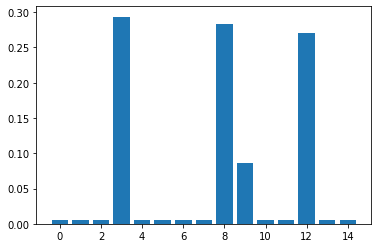

In [179]:
idx = 39
plt.bar(np.arange(15), lda_topics[idx,:])
print('Importance', np.argsort(lda_topics[idx, :])[::-1])
print('Narrative:', valid_df['tweet'].values[idx])

## Using pre-trained US model

In [82]:
from scripts.predict_topics import gen_topic_map, predict_complaint_topics

In [85]:
with open('../example/input/lda_45_topics.pkl', 'rb') as f:
    data = pickle.load(f)
us_lda_model = data['model']
vectorizer = data['vectorizer']

topic_map = gen_topic_map('../example/input/topics_matching.xlsx')
vectorized = vectorizer.transform(valid_df['cleaned'])
topics = us_lda_model.transform(vectorized)

Importance
8 Taking out or refinancing mortgage
2 Signing contracts
15 ESCROW
16 Terms and conditions of accounts
29 Opening or closing account
Narrative: @AskNationwide if I were to call you about my account would you be able to tell me if there are and pending payments to said account. For example BACS


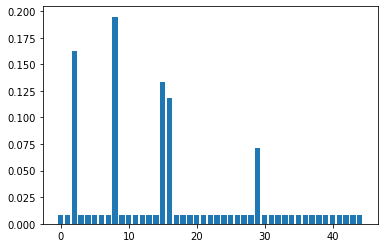

In [150]:
idx = 32
plt.bar(np.arange(45), topics[idx,:])
print('Importance')
for i in np.argsort(topics[idx, :])[::-1][:5]:
    print(i, topic_map[i])

print('Narrative:', valid_df['tweet'].values[idx])